In [15]:
# STEP1: Lib import and dataset upload

import pandas as pd
import matplotlib.pyplot as plt

# Upload my dataset .csv
df = pd.read_csv('/Users/antonnolan/Documents/Webeet/_onboarding_data/daily_tasks/day_2/day_2_datasets/high-school-directory.csv')

# Let's have a look first 5 rows
df.head()

# Here I want to make sure file upload correctly and see a table structure.



,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,bus,subway,primary_address_line_1,city,state_code,postcode,website,total_students,campus_name,school_type,overview_paragraph,program_highlights,language_classes,advancedplacement_courses,online_ap_courses,online_language_courses,extracurricular_activities,psal_sports_boys,psal_sports_girls,psal_sports_coed,school_sports,partner_cbo,partner_hospital,partner_highered,partner_cultural,partner_nonprofit,partner_corporate,partner_financial,partner_other,addtl_info1,addtl_info2,start_time,end_time,se_services,ell_programs,school_accessibility_description,number_programs,priority01,priority02,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,"Q113, Q22",A to Beach 25th St-Wavecrest,8-21 Bay 25 Street,Far Rockaway,NY,11691,http://schools.nyc.gov/schoolportals/27/Q260,412.0,Far Rockaway Educational Campus,NaN,Frederick Douglass Academy (FDA) VI High Schoo...,"Advisory, Graphic Arts Design, Teaching Intern...",Spanish,"Calculus AB, English Language and Composition,...","Biology, Physics B","French, Spanish","After-school Program, Book, Writing, Homework ...","Basketball, Cross Country, Indoor Track, Outdo...","Basketball, Cross Country, Indoor Track, Outdo...",NaN,"Step Team, Modern Dance, Hip Hop Dance",NaN,"Jamaica Hospital Medical Center, Peninsula Hos...","York College, Brooklyn College, St. John's Col...",NaN,"Queens District Attorney, Sports and Arts Foun...","Replications, Inc.",Citibank,New York Road Runners Foundation (NYRRF),"Uniform Required: plain white collared shirt, ...","Extended Day Program, Student Summer Orientati...",7:45 AM,2:05 PM,This school will provide students with disabil...,ESL,Not Functionally Accessible,1,Priority to Queens students or residents who a...,Then to New York City residents who attend an ...,Then to Queens students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"{'latitude': '40.601989336', 'longitude': '-73...",14.0,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,20529.0,51,3,47,59
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,"B1, B3, B4, B6, B64, B82",D to 25th Ave ; N to Ave U ; N to Gravesend - ...,2630 Benson Avenue,Brooklyn,NY,11214,http://schools.nyc.gov/schoolportals/21/K559,260.0,Lafayette Educational Campus,NaN,At Life Academy High School for Film and Music...,"College Now, iLEARN courses, Art and Film Prod...",Spanish,NaN,"Biology, English Literature and Composition, E...",NaN,"Film, Music, Talent Show, Holiday Concert, Stu...","Basketball, Bowling, Indoor Track, Soccer, Sof...","Basketball, Bowling, Indoor Track, Soccer, Sof...",Cricket,NaN,Coney Island Generation Gap,NaN,"City Tech, Kingsborough Early College Secondar...","Museum of the Moving Image, New York Public Li...",Institute for Student Achievement,"Film Life, Inc., SONY Wonder Tech",NaN,NaN,Our school requires completion of a Common Cor...,NaN,8:15 AM,3:00 PM,This school will provide students with disabil...,ESL,Functionally Accessible,1,Priority to New York City residents who attend...,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'latitude': '40.593593811', 'longitude': '-73...",13.0,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,"B15, B38, B46, B47, B52, B54, Q24","J to Kosciusko St ; M, Z to Myrtle Ave",1014 Lafayette Avenue,Brooklyn,NY,11221,http://schools.nyc.gov/schoolportals/16/K393,155.0,NaN,NaN,The Frederick Douglass Academy IV (FDA IV) Sec...,"C

# STEP2: Column names - lower case, spaces clean up.

In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

# STEP3: Here I want to define a columns I need 

Column name CSV                 To clean/Not to clean
School Name                              yes
Borough                                  yes
Total Students                           yes
School Type                              yes
Number Programs                          yes
Grade Span Min/Max                        no
Program Highlights, AP, ect.              no(only if deep analysis establish)       
        

In [18]:
# Only definet columns
columns_needed = [
    'school_name',
    'borough',
    'total_students',
    'school_type',
    'number_programs'
]
df = df[columns_needed]

# STEP4: Checking and cleaning

In [19]:
# Checking for missing values
print(df.isnull().sum())

# Delete rows with no values(total_students - if it  exist)
df = df.dropna(subset=['total_students'])


school_name          0
borough              0
total_students       9
school_type        331
number_programs      0
dtype: int64


# STEP5: Number of schools in every borough

borough
Brooklyn         119
Bronx            118
Manhattan        103
Queens            76
Staten Island     10
Name: count, dtype: int64


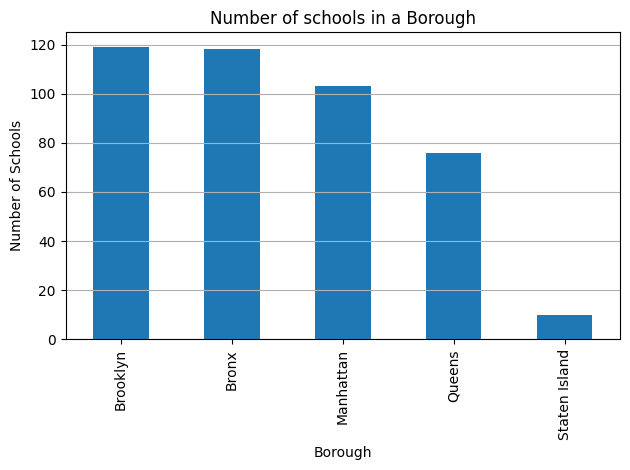

In [20]:
# Number of schools
schools_by_borough = df['borough'].value_counts()
print(schools_by_borough)

# Build a graph
schools_by_borough.plot(kind='bar', title='Number of schools in a Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Schools')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# STEP6: Avg number of students in each Borough


borough
Staten Island    1847.500000
Queens           1046.644737
Brooklyn          699.134454
Manhattan         589.825243
Bronx             490.406780
Name: total_students, dtype: float64


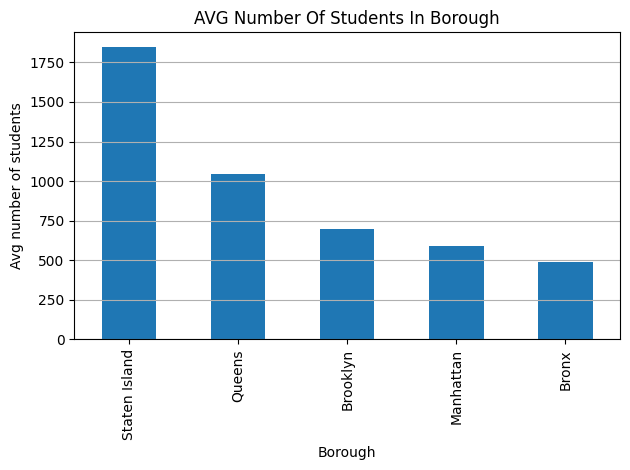

In [21]:
avg_students = df.groupby('borough')['total_students'].mean().sort_values(ascending=False)
print(avg_students)

# Graph
avg_students.plot(kind='bar', title='AVG Number Of Students In Borough')
plt.xlabel('Borough')
plt.ylabel('Avg number of students')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# STEP7: School size distribution


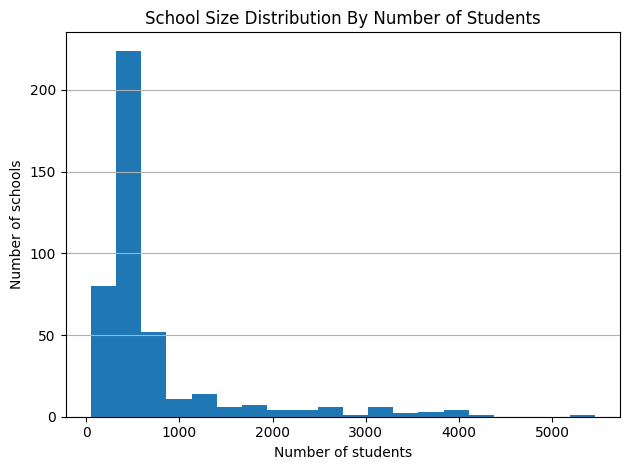

In [23]:
df['total_students'].plot(kind='hist', bins=20, title='School Size Distribution By Number of Students')
plt.xlabel('Number of students')
plt.ylabel('Number of schools')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# STEP8: Avg number of programs


borough
Staten Island    5.000000
Queens           2.184211
Brooklyn         1.865546
Manhattan        1.388350
Bronx            1.296610
Name: number_programs, dtype: float64


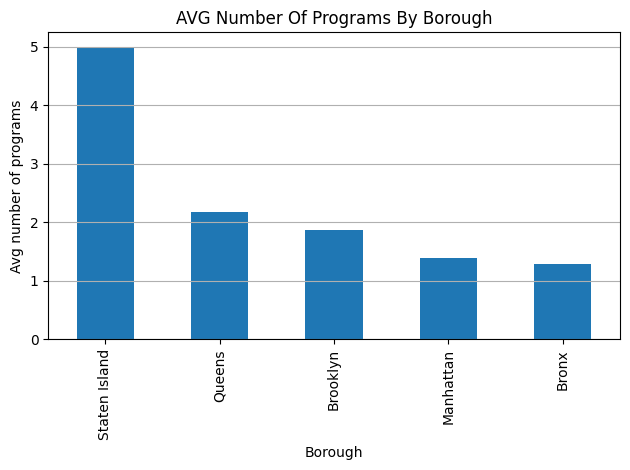

In [ ]:
avg_programs = df.groupby('borough')['number_programs'].mean().sort_values(ascending=False)
print(avg_programs)

# Graph
avg_programs.plot(kind='bar', title='AVG Number Of Programs By Borough')
plt.xlabel('Borough')
plt.ylabel('Avg number of programs')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# STEP9: Conclusions

	•	Brooklyn and Bronx are the two boroughs with the highest number of schools.  Brooklyn has the highest number of schools, but they are smaller in size compared to those in Staten Island or Queens.
	•	In Staten Island, the number of schools is lower, but they are larger by student count and offer more programs. It shows the highest average school size and number of programs, which may indicate a more centralized educational structure.
	•	The average number of students ranges from 500 to 1800. The distribution of student numbers reveals a high variability among schools — there are both small and very large educational institutions.
	•	Most schools offer only 1–2 programs, but there are also schools with a significantly higher number of programs.